In [ ]:
pip install pyspellchecker

In [1]:
"""
author : @akahs
"""

'\nauthor : @akahs\n'

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("UpdatedResumeDataSet.csv")

In [3]:
#data analysis step
df.shape

(962, 2)

In [4]:
df.head(5)

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [5]:
df.columns

Index(['Category', 'Resume'], dtype='object')

In [6]:
df.isnull().sum()

Category    0
Resume      0
dtype: int64

In [7]:
df.describe()

,Category,Resume
count,962,962
unique,25,166
top,Java Developer,"Technical Skills Web Technologies: Angular JS,..."
freq,84,18


In [8]:
df.shape

(962, 2)

In [9]:
df['Category'].value_counts()

Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Sales                        40
Data Science                 40
Mechanical Engineer          40
ETL Developer                40
Blockchain                   40
Operations Manager           40
Arts                         36
Database                     33
Health and fitness           30
PMO                          30
Electrical Engineering       30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
Civil Engineer               24
SAP Developer                24
Advocate                     20
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='Category'>

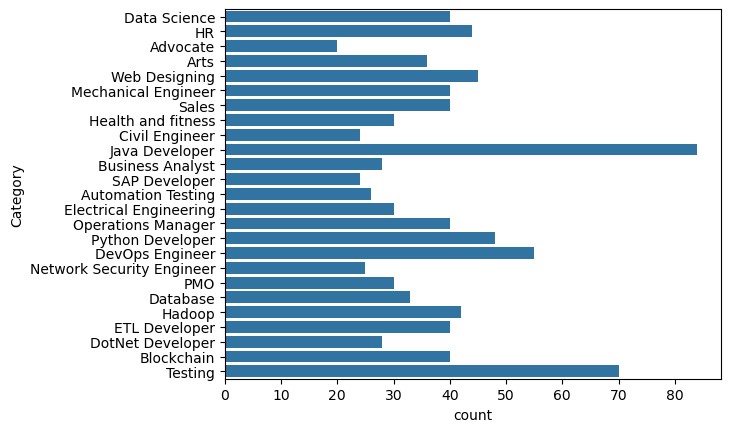

In [10]:
sns.countplot(df['Category'])

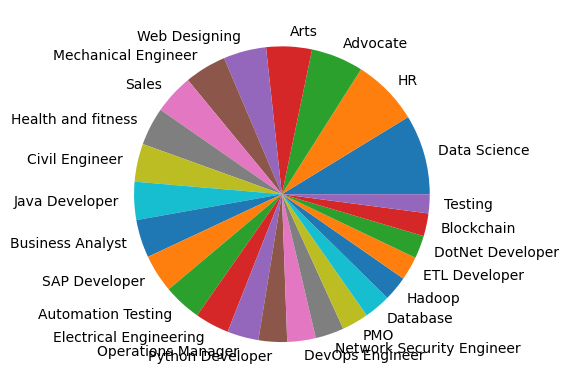

In [11]:

labels=df['Category'].unique()
plt.pie(df['Category'].value_counts(),labels=labels)
plt.show()

In [12]:
#now perform data preprocessing step

df['Category'].value_counts()

Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Sales                        40
Data Science                 40
Mechanical Engineer          40
ETL Developer                40
Blockchain                   40
Operations Manager           40
Arts                         36
Database                     33
Health and fitness           30
PMO                          30
Electrical Engineering       30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
Civil Engineer               24
SAP Developer                24
Advocate                     20
Name: count, dtype: int64

In [13]:
#df['Resume'][0]

In [14]:
"""
text data preprocessing common steps:

1) convert into lowercase
2) remove html tag
3) remove URLs
4) remove puncuation (!,,? ., etc)
5) removing special char
6) chat word treatment (like FYI for your inforamtion etc)
7) spelling correction
8) stop words removing (like at, the , of, in, etc)
9) handle emojies
10) tokenization

advanced preprocessing 
1) stremming 
2) lemmatization
3) pos-tag

"""

'\ntext data preprocessing common steps:\n\n1) convert into lowercase\n2) remove html tag\n3) remove URLs\n4) remove puncuation (!,,? ., etc)\n5) removing special char\n6) chat word treatment (like FYI for your inforamtion etc)\n7) spelling correction\n8) stop words removing (like at, the , of, in, etc)\n9) handle emojies\n10) tokenization\n\nadvanced preprocessing \n1) stremming \n2) lemmatization\n3) pos-tag\n\n'

In [15]:
#text clean preprocessing step-------------

import re
import string
import html
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from textblob import TextBlob
from spellchecker import SpellChecker
import emoji
import nltk
nltk.download('punkt_tab')


import re
import string 
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    
    # Remove URLs
    text = re.sub(r'http\S+', '', text)
    
    # Remove hashtags
    text = re.sub(r'#\w+', '', text)
    
    # Remove special characters
    text = re.sub('[^A-Za-z0-9\s]+', '', text)
    
    # Remove punctuation
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)

    # Remove newline characters, carriage return characters, and other special characters
    text = re.sub(r'[\n\r\t]', ' ', text)
    text = re.sub(r'[^\w\s]', '', text)
    
    
    return text


[nltk_data] Downloading package punkt_tab to
[nltk_data]     /home/u911ea9076426f747fe4b87b316beb42/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [16]:
df['Resume']=df['Resume'].apply(lambda x: preprocess_text(x))

In [17]:
df['Category'].unique()

array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      dtype=object)

In [18]:
###now data is cleaned  and now i w

In [19]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [20]:
le.fit(df['Category'])
df['Category']=le.transform(df['Category'])

In [21]:
df['Category'].unique()

array([ 6, 12,  0,  1, 24, 16, 22, 14,  5, 15,  4, 21,  2, 11, 18, 20,  8,
       17, 19,  7, 13, 10,  9,  3, 23])

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer()

tfidf.fit(df['Resume'])
vector=tfidf.transform(df['Resume'])

In [23]:
vector

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 186852 stored elements and shape (962, 8104)>

In [24]:
#split the data

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(vector,df['Category'],test_size=0.2,random_state=42)

In [28]:
#now train the model

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix

# Initialize classifiers
classifiers = {
    'KNN': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'Logistic Regression': LogisticRegression()
}

# Train and evaluate each classifier
for clf_name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy for {clf_name}: {accuracy}')
    #print(f"confusion_matrix {clf_name}: {confusion_matrix(y_test,y_pred)}")

Accuracy for KNN: 0.9844559585492227
Accuracy for Random Forest: 0.9896373056994818
Accuracy for SVM: 0.9948186528497409
Accuracy for Logistic Regression: 0.9948186528497409


In [26]:
y_pred

array([15, 15, 15, 13, 14, 17, 16,  2,  0, 14, 13, 12, 16, 23, 20,  5,  6,
        4, 10,  9, 19,  1, 10, 23, 23,  6, 22, 22,  2, 12, 18,  1,  8, 24,
       11, 23,  7, 12, 24,  8, 18,  6,  8, 19, 24, 23, 21,  1, 15,  4, 15,
       22, 11,  5, 15, 13,  1, 19,  5, 12, 22, 22, 20, 24, 21, 18, 12, 10,
       10, 20, 10,  8,  9, 21, 17, 21,  0, 17, 16, 14, 15, 11, 11,  8, 20,
        3, 19,  8,  0,  2,  9, 10,  2, 23, 20, 20, 23, 12, 18, 12,  7, 16,
        8, 14, 18,  3, 14, 19, 14, 14, 15, 18,  8,  2, 21, 18, 23, 10, 23,
        5, 11, 15, 12,  3,  5,  3,  7, 12, 19,  8, 20, 19,  3, 15,  9, 19,
        1, 23, 21,  5, 20, 15, 16,  7,  7,  8, 15, 18,  1, 15, 13, 20,  7,
        4, 18, 11,  5, 15,  5, 12,  9, 22, 18, 21,  8, 23,  4, 12, 24, 16,
       15, 22,  8, 22,  3, 16, 23, 23, 12,  7, 16, 18,  5,  3, 18,  8, 23,
       23, 20,  6,  6,  7, 23])

In [40]:
accuracy_score(y_test,y_pred)

0.9844559585492227

In [44]:
my_resume="""
HCLTech| Software Engineer(2.10 years) | Noida
 Jan’22- Present
 ● Developedandimplemented machine learning algorithms for dynamic resource allocation, optimization, and network slicing
 in Keysight 5G networks (achieving 40% higher throughput and 20% lower latency).
 ● 5GNetworkLogs:usedNLPtechniques to parse and interpret network logs to identify patterns, anomalies, and potential
 security threats. This can help automate troubleshooting and improve network security.
 ● Analyzednetworkconditions and user demands to improve resource allocation strategies.
 ● Preprocessed data, engineered features, and handled missing values for model training.
 CETPA InfoTech| Machine Learning Intern| Noida
 ● workedonaprojectforcustomersegmentation.
 ● Visualizedgenderandagedistributionandthenanalyzedtheirincomeandspendingscores.
 ● K-meansclustering,hierarchicalclustering, andDBSCANclusteringwereused.
 IIT KHARAGPUR| Machine Learning Training| Virtual
 ● Appliedmachinelearning principles to real-world problems through hands-on projects.
 ● Utilized popular machine learning libraries, including scikit-learn.
 ● Collaborated with peers and expert instructors to deepen understanding of machine learning concepts.
 Projects | Academic project
 Jul’21- Dec’21
 May’20- Jul’20
 Age-Gender Recognition Model
 Python, TensorFlow, Keras, CNN, Matplotlib, sci-kit-learn
 ● 1.Classified Age into 9 Categories with an accuracy of 75.1% and 1-off accuracy of 91.9%.
 ● 2.Classified Gender in 2 Categories with an accuracy of 92.9%, it used VGG-16 CNN architecture as the backbone.
 ● 3.DeployedontheMallCCTVcamerasystem, impacting the sales and marketing industry, and 1000’s indirectly
 Covid-19 Test Classification | github
 Jan’22
 May’20
 Machine Learning, Python
 ● Developedamachinelearning model using logistic regression to classify COVID-19 infections based on patient symptoms.
 ● UsedtheLogistic Regression ML algorithm. Achieved 98% accuracy in classifying COVID-19 infections.
 Apple Stock Price Prediction and Forecasting
 Python, Machine Learning & Deep Learning
 Mar’20
 ● GotthedatafromTingoAPI. Created a stacked LSTM RNN model to predict the company's stock price for the next 30 days by
 providing a time step of the previous 100 days. Got a test RMSE equal to 239.6.
 Education
 Moradabad Institute of Technology(MIT), UP, India
 B.Tech Computer Science & Engineering, CGPA: 8.5/10
 Coursework: Python, C, Machine Learning, Mathematics, Data Structure, Algorithms, Computer Network
 Skills
 May’18- Jul’22
 ● ProgrammingLanguages:Python(expert),C(basic),C++(basic)
 ● DataScienceLibraries:NumPy,Pandas,Scikit-learn,TensorFlow,Pytorch(basic), Keras
 ● MachineLearning:Regression,Classification,Clustering, regression, Instance-based learning, Decision trees, Bayesian statistics,
 clustering, neural, networks, ensemble methods, Deep Learning (CNNs, RNNs, LSTMs), Reinforcement Learning
 ● LargeLanguageModels(LLMs):Familiarwitharchitectures,capabilities, and limitations of LLMs, e.g., GPT-3, Llama 2,
 ● Frameworks:TensorFlow,NLTK,Scikit-learn
 ● DataHandling:Datacleaning,normalization,featureengineering, missing value imputation
 Certification
 ● Machinelearning certification from IBM
 ● Machinelearning certification from IIT Kharagpur
 ● Pythonprogrammingcertification from IIT Kanpur
 ● Tensorflowcertification from Coursera
"""

In [47]:
pred_resume_id

6

In [48]:
df['Category'].unique()

array([ 6, 12,  0,  1, 24, 16, 22, 14,  5, 15,  4, 21,  2, 11, 18, 20,  8,
       17, 19,  7, 13, 10,  9,  3, 23])

In [66]:
job_titles = ['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
              'Mechanical Engineer', 'Sales', 'Health and fitness',
              'Civil Engineer', 'Java Developer', 'Business Analyst',
              'SAP Developer', 'Automation Testing', 'Electrical Engineering',
              'Operations Manager', 'Python Developer', 'DevOps Engineer',
              'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
              'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing']

indices = [6, 12, 0, 1, 24, 16, 22, 14, 5, 15, 4, 21, 2, 11, 18, 20, 8, 17, 19, 7, 13, 10, 9, 3, 23]

# Create a dictionary to map indices to job titles
index_to_job_title = {index: job_title for index, job_title in zip(indices, job_titles)}

# Example: Map index 16 to its job title
index = pred_resume_id
job_title = index_to_job_title.get(index, "Job title not found")  # Get the job title or return a default message
print(f"The job title at index {index} is: {job_title}")

The job title at index 6 is: Data Science


In [ ]:
#want to save model then this code 


"""
import pickle

pickle.dump(tfidf,open('tfidf.pkl','wb'))
pickle.dump(clf,open('clf.pkl','wb'))



clf=pickle.load(open('clf.pkl','rb'))
tfidf=pickle.load(open('tfidf.pkl','rb'))


clean_resume=preprocess_text(my_resume)

#transform the cleaned resume into vector using tfidf method 

input_features=tfidf.transform([clean_resume])

#make prediction

pred_resume_id=clf.predict(input_features)[0]

"""